In [14]:
import cv2
import numpy as np


""" 
Python implementation of technology discussed in 'Dynamic Image Networks for Action Recognition' by Bilen et al.
Their paper and GitHub can be found here: https://github.com/hbilen/dynamic-image-nets
"""


def get_dynamic_image(frames, normalized=True):
    """ Takes a list of frames and returns either a raw or normalized dynamic image."""
    num_channels = frames[0].shape[2]
    channel_frames = _get_channel_frames(frames, num_channels)
    channel_dynamic_images = [_compute_dynamic_image(channel) for channel in channel_frames]

    dynamic_image = cv2.merge(tuple(channel_dynamic_images))
    if normalized:
        dynamic_image = cv2.normalize(dynamic_image, None, 0, 255, norm_type=cv2.NORM_MINMAX)
        dynamic_image = dynamic_image.astype('uint8')

    return dynamic_image


def _get_channel_frames(iter_frames, num_channels):
    """ Takes a list of frames and returns a list of frame lists split by channel. """
    frames = [[] for channel in range(num_channels)]

    for frame in iter_frames:
        for channel_frames, channel in zip(frames, cv2.split(frame)):
            channel_frames.append(channel.reshape((*channel.shape[0:2], 1)))
    for i in range(len(frames)):
        frames[i] = np.array(frames[i])
    return frames


def _compute_dynamic_image(frames):
    """ Adapted from https://github.com/hbilen/dynamic-image-nets """
    num_frames, h, w, depth = frames.shape

    # Compute the coefficients for the frames.
    coefficients = np.zeros(num_frames)
    for n in range(num_frames):
        cumulative_indices = np.array(range(n, num_frames)) + 1
        print(((2*cumulative_indices) - num_frames) / cumulative_indices)
        coefficients[n] = np.sum(((2*cumulative_indices) - num_frames) / cumulative_indices)
        #print(cumulative_indices)
        #print(coefficients)
    # Multiply by the frames by the coefficients and sum the result.
    x1 = np.expand_dims(frames, axis=0)
    print(x1.shape)
    x2 = np.reshape(coefficients, (num_frames, 1, 1, 1))
    print(x2.shape)
    result = x1 * x2
    return np.sum(result[0], axis=0).squeeze()


def get_video_frames(video_path):
    # Initialize the frame number and create empty frame list
    video = cv2.VideoCapture(video_path)
    frame_list = []

    # Loop until there are no frames left.
    try:
        while True:
            more_frames, frame = video.read()

            if not more_frames:
                break
            else:
                frame_list.append(frame)

    finally:
        video.release()

    return frame_list

In [15]:
def get_video_frames(video_path):
    # Initialize the frame number and create empty frame list
    video=np.load(video_path)
    frames,H,W,C=np.shape(video)
    frame_list = []

    # Loop until there are no frames left.
    for i in range(frames):
        frame_list.append(video[i,:,:,:])
    return frame_list

In [16]:
import glob
import os
video_path_list=glob.glob("/data/scratch/xxing/adni_dl/Preprocessed/ADNI2_MRI/CN/*/*.npy")
testlist=[]
testlist.append(video_path_list[0])
print(testlist)

['/data/scratch/xxing/adni_dl/Preprocessed/ADNI2_MRI/CN/094_S_4649/094_S_4649.npy']


In [17]:
import glob
import os
video_path_list=glob.glob("/data/scratch/xxing/adni_dl/Preprocessed/ADNI2_MRI/CN/*/*.npy")
#out_file="/data/scratch/xxing/adni_dl/Dynamic/ADNI2_MRI/CN/"
#os.makedirs(out_file)
d3list=[]
print(len(video_path_list))
testlist=[]
testlist.append(video_path_list[0])
for i in testlist:
    pid=os.path.basename(i)
    #print(pid)
    video=get_video_frames(i)
    #print(len(video))
    di=get_dynamic_image(video,normalized=True)
    di=np.reshape(di,(110,110,1))
    result=np.concatenate((di,di,di),2)
    #np.save((out_file+pid),result)
    d3list.append(result)
d3data=np.asarray(d3list)
#np.save("/data/scratch/xxing/adni_dl/ADNI2_MRI_CN_Dynamic_data.npy",d3data)
    


50
[-1.08000000e+02 -5.30000000e+01 -3.46666667e+01 -2.55000000e+01
 -2.00000000e+01 -1.63333333e+01 -1.37142857e+01 -1.17500000e+01
 -1.02222222e+01 -9.00000000e+00 -8.00000000e+00 -7.16666667e+00
 -6.46153846e+00 -5.85714286e+00 -5.33333333e+00 -4.87500000e+00
 -4.47058824e+00 -4.11111111e+00 -3.78947368e+00 -3.50000000e+00
 -3.23809524e+00 -3.00000000e+00 -2.78260870e+00 -2.58333333e+00
 -2.40000000e+00 -2.23076923e+00 -2.07407407e+00 -1.92857143e+00
 -1.79310345e+00 -1.66666667e+00 -1.54838710e+00 -1.43750000e+00
 -1.33333333e+00 -1.23529412e+00 -1.14285714e+00 -1.05555556e+00
 -9.72972973e-01 -8.94736842e-01 -8.20512821e-01 -7.50000000e-01
 -6.82926829e-01 -6.19047619e-01 -5.58139535e-01 -5.00000000e-01
 -4.44444444e-01 -3.91304348e-01 -3.40425532e-01 -2.91666667e-01
 -2.44897959e-01 -2.00000000e-01 -1.56862745e-01 -1.15384615e-01
 -7.54716981e-02 -3.70370370e-02  0.00000000e+00  3.57142857e-02
  7.01754386e-02  1.03448276e-01  1.35593220e-01  1.66666667e-01
  1.96721311e-01  2.25

In [9]:
#label=np.zeros((182,1))
#np.save("/data/scratch/xxing/adni_dl/CN_AV45_Dynamic_label.npy",label)

In [11]:
glob.glob("/data/scratch/xxing/adni_dl/Dynamic/Sampled/FDG/CN/*.npy")

['/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/EMCI/137_S_4299.npy',
 '/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/EMCI/022_S_5004.npy',
 '/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/EMCI/137_S_4623.npy',
 '/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/EMCI/041_S_4271.npy',
 '/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/EMCI/099_S_4157.npy',
 '/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/EMCI/014_S_4328.npy',
 '/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/EMCI/123_S_4780.npy',
 '/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/EMCI/072_S_4539.npy',
 '/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/EMCI/098_S_4059.npy',
 '/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/EMCI/068_S_4431.npy',
 '/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/EMCI/130_S_4405.npy',
 '/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/EMCI/021_S_5099.npy',
 '/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/EMCI/153_S_4838.npy',
 '/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/

(160, 160, 3)


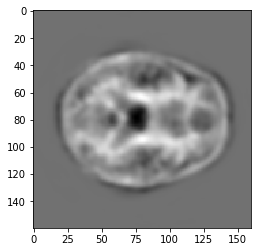

In [12]:
import matplotlib.pyplot as plt
#b=np.clip(b-125,0,255)
data=np.load('/data/scratch/xxing/adni_dl/Dynamic/Sampled/AV45/EMCI/137_S_4299.npy')
print(data.shape)
plt.imshow(data)
#plt.colorbar()

In [ ]:
np.min(c)